In [1]:
import numpy as np
import libpysal
import mapclassify as mc
import automatization
import dem_polygon_treatment
from dem_utils_import import load_json, load_rast

C:\Users\montse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


## Test functions of the module:

In [2]:
#Load Paths:
trails_3d_path = 'C:/Users/montse/Desktop/ARI-Git/jupyterlab-data-science/src/data/geo_data_saetde/trails_4326.geojson'
dem_path = '../inputs/dem_saetde.tif'
out_tif_path = '../outputs/rasters/unique_slope_rasters/pala_nova/pala_nova.tif'
out_tif_path_imageio = '../outputs/rasters/unique_slope_rasters/pala_nova/pala_nova_imageio.tif'
out_slope_path = '../outputs/rasters/unique_slope_rasters/pala_nova/slope_pala_nova.tif'
out_aspect_path = '../outputs/rasters/unique_slope_rasters/pala_nova/aspect_pala_nova.tif'
slope_name = 'pala_nova'
sd_210322_path = '../inputs/snow_depth_data/grau_roig/sd_210322.geojson'

input_dem = '../outputs/rasters/unique_slope_rasters/pala_nova/pala_nova.tif'
out_slope_path = '../outputs/rasters/unique_slope_rasters/pala_nova/slope_pala_nova.tif'
out_aspect_path = '../outputs/rasters/unique_slope_rasters/pala_nova/aspect_pala_nova.tif'

In [3]:
#First function test with the 'pala_nova' slope:
stats_palanova = automatization.get_stats_trail(trails_3d_path, slope_name, dem_path, out_tif_path, out_tif_path_imageio, out_slope_path, out_aspect_path, sd_210322_path)

In [4]:
#Get region percentatges of the slope:
height_list = [1900, 2000, 2100, 2200, 2300, 2400, 2500, 2700]
slope_list = [0, 5, 10, 15, 20, 25, 30, 35, 40, 90]
aspect_list = [315, 45, 135, 225, 315]
list_lists = [height_list, slope_list, aspect_list]

result = automatization.get_stats_pctg(input_dem, out_slope_path, out_aspect_path, height_list, slope_list, aspect_list)
result_pctg = automatization.num_to_pctg(result)

print('Stats slope: ', result)
print('Stats slope in percentage: ', result_pctg)

Stats slope:  [[0.0, 0.0, 0.38062209690210347, 0.2447602623330522, 0.37461764076484433, 0.0, 0.0], [0.13689876438457868, 0.3092618125894893, 0.22827066871718726, 0.15370949779922574, 0.10488147637482102, 0.042079864241395766, 0.011613724346396563, 0.003460253486768839, 0.00982393806013682], [0.0, 0.02893964168292983, 0.12871635283154878, 0.8423440054855214]]
Stats slope in percentage:  [[0.0, 0.0, 0.38062209690210347, 0.2447602623330522, 0.37461764076484433, 0.0, 0.0], [0.13689876438457868, 0.3092618125894893, 0.22827066871718726, 0.15370949779922574, 0.10488147637482102, 0.042079864241395766, 0.011613724346396563, 0.003460253486768839, 0.00982393806013682], [0.0, 0.02893964168292983, 0.12871635283154878, 0.8423440054855214]]


## Plotting the data

In [5]:
import plotly.subplots as ps
import plotly.graph_objects as go

In [6]:
#Plotting:
data = ['Min', 'Max', 'Mean', 'Weighted_Mean', 'Median', 'Variance', 'Standard_Dev', 'Skeweness', 'Ranges']

pctgs = ps.make_subplots(rows=2, cols=3, subplot_titles=['<b> Height_Classification </b>', '<b> Slope_Classification </b>', '<b> Aspect_Classification </b>', '<b> Snowdepth 21/03/2022'], specs=[[{'type':'pie'}, {'type':'pie'}, {'type':'pie'}], [{'type':'bar'}, {'type':'bar'}, {'type':'bar'}]])
list_stat = result_pctg

aspect_str_list = ['north', 'south', 'west', 'east']
height_str_list = ['1900_2000', '2000_2100', '2100_2200', '2200_2300', '2300_2400', '2400_2500', '2500_2700']
slope_str_list = ['0_5', '5_10', '10_15', '15_20', '20_25', '25_30', '30_40', '40_90']
list_lists = [height_str_list, slope_str_list, aspect_str_list]

labels = ['Trace Height', 'Trace Slope', 'Trace Aspect']
name_list = ['Height_trace', 'Slope_trace', 'Aspect_trace']

for i in range(len(list_stat)):
  to_plot = list_stat[i]
  list_label = list_lists[i]
  pctgs.add_pie(
    values=to_plot,
    labels=list_label,
    
    textposition='outside',
    textinfo='percent+label',
    name=name_list[i],
    legendgroup='1',
    showlegend=False,
    hole= .2,
    row=1,
    col=i+1 
  )

pctgs.add_scatter(
  x= ['Min', 'Max', 'Mean', 'Weighted_Mean', 'Median', 'Variance', 'Standard_Dev', 'Skeweness', 'Ranges'],
  y= stats_palanova,
  marker=dict(line=dict(width=1., color='black'), color=['lightyellow','yellow','orange', 'orangered', 'red', 'purple', 'violet', 'blue', 'darkblue']),
  name='Slope_Trail metadata',
  row=2,
  col=1,)
pctgs.update_xaxes(title_text='property')
pctgs.update_yaxes(title_text='associated_value')
pctgs.update_layout(title='<b> PALA NOVA METADATA </b>', width=1800, height=1000, template='ggplot2')

## Analysis of the data

### Get metadata from the raster

In [7]:
#Height distribution
height_rast = load_rast.open_raster_array(out_tif_path)
height_rast = np.where(height_rast > 3.3999e38, 0., height_rast)

height_rast_vals = height_rast[np.where(height_rast != 0.)]
sum_height = np.sum(height_rast_vals)
count_height = int(height_rast_vals.shape[0])

height_1900_2000 = height_rast_vals[np.where((height_rast_vals >= 1900.) & (height_rast_vals < 2000.))]
height_2000_2100 = height_rast_vals[np.where((height_rast_vals >= 2000.) & (height_rast_vals < 2100.))]
height_2100_2200 = height_rast_vals[np.where((height_rast_vals >= 2100.) & (height_rast_vals < 2200.))]
height_2200_2300 = height_rast_vals[np.where((height_rast_vals >= 2200.) & (height_rast_vals < 2300.))]
height_2300_2400 = height_rast_vals[np.where((height_rast_vals >= 2300.) & (height_rast_vals < 2400.))]
height_2400_2500 = height_rast_vals[np.where((height_rast_vals >= 2400.) & (height_rast_vals < 2500.))]
height_2500_2700 = height_rast_vals[np.where((height_rast_vals >= 2500.) & (height_rast_vals <= 2700.))]

stats = []
#stats = [mean height, ]


In [8]:
height_list = [height_1900_2000, height_2000_2100, height_2100_2200, height_2200_2300, height_2300_2400, height_2400_2500, height_2500_2700]
height_counts_list = [height_1900_2000.shape[0], height_2000_2100.shape[0], height_2100_2200.shape[0], height_2200_2300.shape[0], height_2300_2400.shape[0], height_2400_2500.shape[0], height_2500_2700.shape[0]]
height_label = ['1900_2000', '2000_2100', '2100_2200', '2200_2300', '2300_2400', '2400_2500', '2500_2700']
percent_height = []

for height in height_counts_list:
  percent = (height/count_height)*100
  percent_height.append(percent)

dict_height = {}
for i in range(len(height_label)):
  dict_height[height_label[i]] = percent_height[i] 

In [9]:
#We plot the percentatges and the normal values:
dict_height

height_pctg = height_counts_list.copy()
summ = sum(height_counts_list)
for j in enumerate(height_counts_list):
  height_pctg[j[0]] = (height_counts_list[j[0]] / summ)*100

In [10]:
#Plotting:
ranges_x_axis = ['1900_2000', '2000_2100', '2100_2200', '2200_2300', '2300_2400', '2400_2500', '2500_2700']

height = ps.make_subplots(rows=1, cols=2, subplot_titles=['Trail Height Data', 'Percentage Height'], specs=[[{'type':'scatter'}, {'type':'pie'}]])
height.add_scatter(
  x= ranges_x_axis,
  y= height_counts_list,
  name='Height distribution',
  marker=dict(line=dict(width=2, color='black'), color=['lightyellow','yellow','orange', 'orangered', 'red', 'pink','purple']),
  row=1, col=1)

height.add_pie(
  values=height_pctg,
  labels=ranges_x_axis,
  hole=.6,
  textposition='inside',
  textinfo='percent+label',
  row=1,
  col=2)
  
height.update_layout(title='Distribution of the slopes')
height.update_xaxes(title_text='Nb. of points')
height.update_yaxes(title_text='Height range')
height.update_traces(line=dict(color='black'), selector=dict(type='scatter'))
height.show()

### Height Evolution

In [11]:
import matplotlib.pyplot as plt

In [12]:
height_rast = load_rast.open_raster_array(out_tif_path)
height_rast = np.where(height_rast > 3.3999e38, 0., height_rast)
height_rast_nodata = height_rast[np.where(height_rast != 0.)]
x_axis_height = []
heights = []
for index, height in enumerate(height_rast_nodata):
  x_axis_height.append(index)
  heights.append(height)

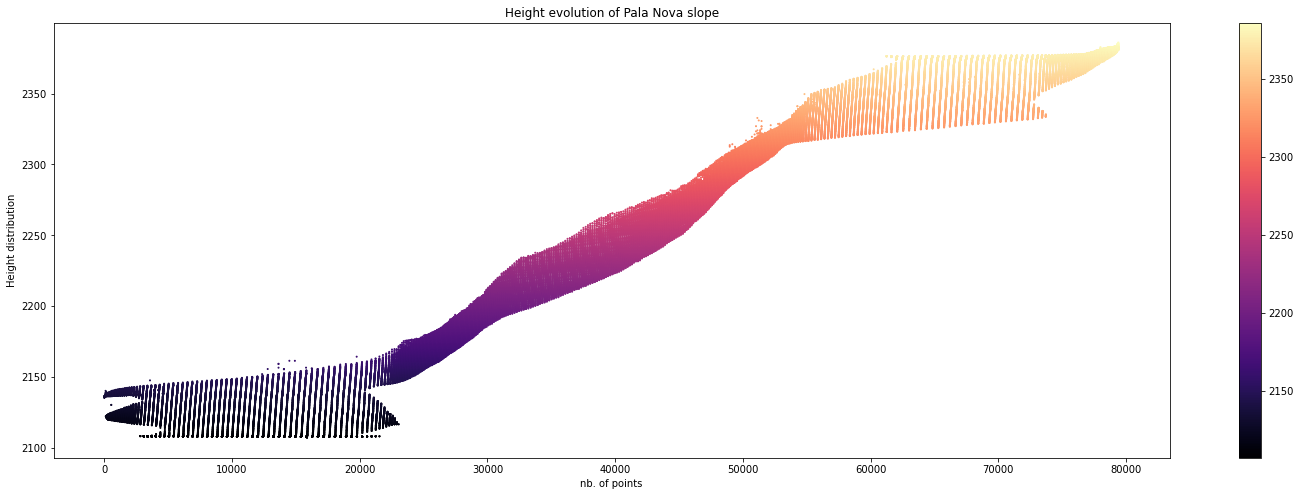

In [13]:
plt.figure(figsize=[25,8])
plt.scatter(
  x=x_axis_height,
  y=heights,
  s=1,
  alpha=1,
  c=heights,
  cmap='magma'
)
plt.title('Height evolution of Pala Nova slope')
plt.xlabel('nb. of points')
plt.ylabel('Height distribution')
plt.colorbar()
plt.show()

### Slope Inclusion

In [14]:
slope_rast = load_rast.open_raster_array(out_slope_path)
slope_rast = np.nan_to_num(slope_rast)
height_full_list = []
slope_full_list = []

for index, height in enumerate(height_rast):
  height_full_list.extend(height)
  slope_full_list.extend(slope_rast[index])

In [15]:
if len(height_full_list) == len(slope_full_list):
  print('The height_list and slope_list have the same length, being: ', len(slope_full_list), 'elements.')

The height_list and slope_list have the same length, being:  635076 elements.


In [16]:
'''plt.figure(figsize=[25,8])
plt.scatter(
  x=axis_list,
  y=height_full_list,
  s=1,
  alpha=1,
  c=slope_full_list,
  cmap='magma'
)
plt.title('Height evolution of Pala Nova slope')
plt.xlabel('nb. of points')
plt.ylabel('Height distribution')
plt.colorbar()
plt.show()'''

"plt.figure(figsize=[25,8])\nplt.scatter(\n  x=axis_list,\n  y=height_full_list,\n  s=1,\n  alpha=1,\n  c=slope_full_list,\n  cmap='magma'\n)\nplt.title('Height evolution of Pala Nova slope')\nplt.xlabel('nb. of points')\nplt.ylabel('Height distribution')\nplt.colorbar()\nplt.show()"

In [17]:
import pandas as pd

df_compare = pd.DataFrame(height_full_list)
df_compare.columns = ['Height']
df_compare['Slope'] = slope_full_list
df_compare['equal_0'] = np.where(df_compare['Height'] == df_compare['Slope'], True, False)
df_compare['new_slope'] = np.where((df_compare['Height'] == 0.) & (df_compare['Slope'] == 90.), 0., df_compare['Slope'])
df_compare['new_height'] = np.where((df_compare['Height'] != 0.) & (df_compare['Slope'] == 0.), 0., df_compare['Height'])

In [18]:
slope_full_list = df_compare['new_slope'].tolist()
height_full_list = df_compare['new_height'].tolist()

In [19]:
def remove_values_from_list(the_list, val):
   return [value for value in the_list if value != val]

In [20]:
height_list_plot = remove_values_from_list(height_full_list, 0.)
slope_list_plot = remove_values_from_list(slope_full_list, 0.)

axis_list = []
for index, height in enumerate(height_list_plot):
  axis_list.append(index)

if len(height_list_plot) == len(slope_list_plot):
  print('Lengths btw. both lists is equal: ', len(height_list_plot))

Lengths btw. both lists is equal:  79435


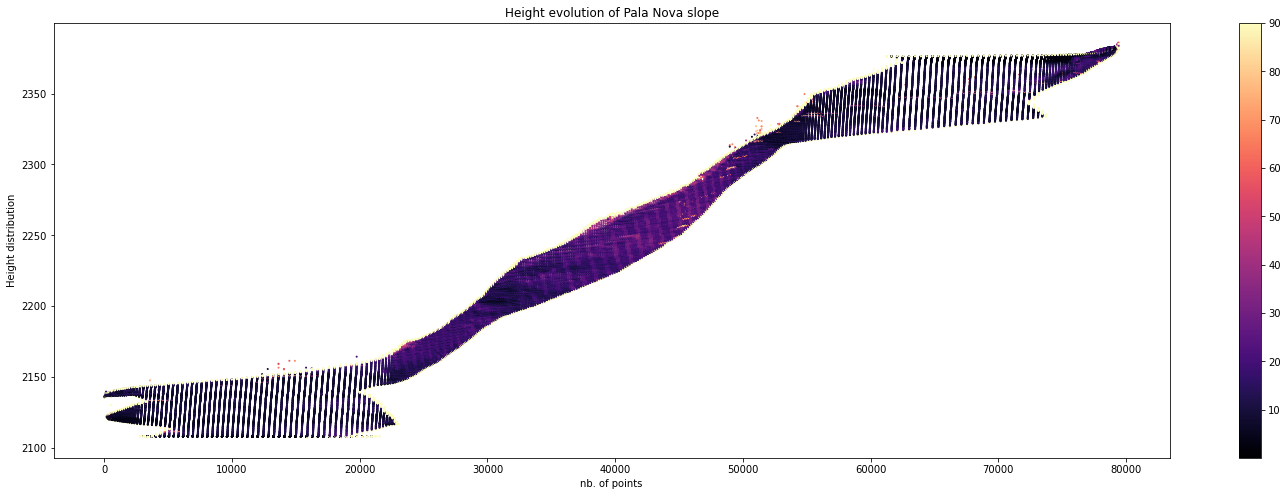

In [21]:
plt.figure(figsize=[25,8])
plt.scatter(
  x=axis_list,
  y=height_list_plot,
  s=1,
  alpha=1,
  c=slope_list_plot,
  cmap='magma'
)
plt.title('Height evolution of Pala Nova slope')
plt.xlabel('nb. of points')
plt.ylabel('Height distribution')
plt.colorbar()
plt.show()